### Initialization

In [1]:
from grid2op import make
from grid2op.Action.PlayableAction import PlayableAction
from grid2op.multi_agent.multiAgentEnv import MultiAgentEnv
import numpy as np
from grid2op.multi_agent.multi_agentExceptions import *

from lightsim2grid import LightSimBackend
bk_cls = LightSimBackend

action_domains = {
    'agent_0' : [0,1,2,3, 4],
    'agent_1' : [5,6,7,8,9,10,11,12,13]
}
observation_domains = action_domains.copy()
env_name = "educ_case14_storage"#"l2rpn_case14_sandbox"
env = make(env_name, test=True, backend=bk_cls(),
                action_class=PlayableAction, _add_to_name="_test_ma", )


ma_env = MultiAgentEnv(env, action_domains, copy_env=False)

ma_env.seed(0)
obs = ma_env.reset()


/home/najarfar/Internship/Grid2Op/grid2op/MakeEnv/Make.py:394: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)
/home/najarfar/Internship/Grid2Op/grid2op/multi_agent/multiAgentEnv.py:123: UserWarning: Rules can not be changed in this version.
  warnings.warn("Rules can not be changed in this version.")
/home/najarfar/Internship/Grid2Op/grid2op/multi_agent/multiAgentEnv.py:129: UserWarning: The central env has been heavily modified (parameters and reset) !
  warnings.warn("The central env has been heavily modified (parameters and reset) !")


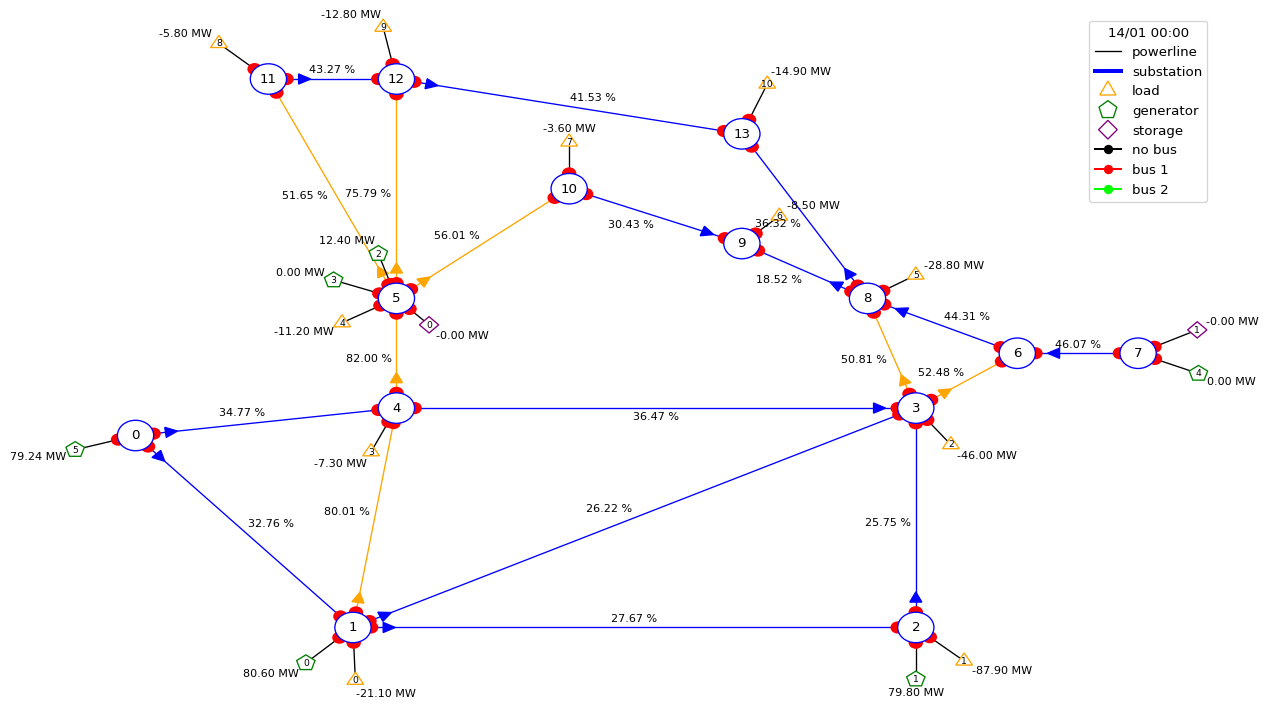

In [2]:
from grid2op.PlotGrid import PlotMatplot
plot_helper = PlotMatplot(ma_env.observation_spaces['agent_1'])
_ = plot_helper.plot_obs(obs['agent_1'])

In [3]:
obs['agent_1'].name_line

array(['0_1_0', '0_4_1', '1_2_2', '1_3_3', '1_4_4', '2_3_5', '3_4_6',
       '5_10_7', '5_11_8', '5_12_9', '8_9_10', '8_13_11', '9_10_12',
       '11_12_13', '12_13_14', '3_6_15', '3_8_16', '4_5_17', '6_7_18',
       '6_8_19'], dtype='<U8')

### Global expert

In [4]:
from grid2op.Observation.baseObservation import BaseObservation
from grid2op.Agent.baseAgent import BaseAgent
class GlobalExpert(BaseAgent):
    def __init__(self,
                 action_space,
                 **kwargs):
        super().__init__(action_space)
        
        self.executed_actions = set()
        
        self.action_space = action_space
        
        self.curr_iter = 0
        
        self.actions_todo = [
            self.action_space({
                'set_bus' : [
                    (self.action_space.line_ex_pos_topo_vect[4], 2),
                    (self.action_space.line_ex_pos_topo_vect[6], 2)
                ]
            })
            ,
            self.action_space({
                'set_bus' : [
                    (self.action_space.line_or_pos_topo_vect[7], 2),
                    (self.action_space.gen_pos_topo_vect[3], 2)
                ]
            })
            ,
            self.action_space({
                'set_bus' : [
                    (self.action_space.line_ex_pos_topo_vect[3], 2),
                    (self.action_space.load_pos_topo_vect[2], 2),
                    (self.action_space.line_or_pos_topo_vect[15], 1),
                    (self.action_space.line_or_pos_topo_vect[16], 1),
                    (self.action_space.line_ex_pos_topo_vect[5], 1),
                    (self.action_space.line_or_pos_topo_vect[6], 1),
                ]
            })
            ,
            self.action_space({
                'set_bus' : [
                    (self.action_space.line_ex_pos_topo_vect[3], 2),
                    (self.action_space.line_or_pos_topo_vect[15], 2),
                    (self.action_space.line_or_pos_topo_vect[16], 2),
                    (self.action_space.line_ex_pos_topo_vect[5], 1),
                    (self.action_space.line_or_pos_topo_vect[6], 1),
                    (self.action_space.load_pos_topo_vect[2], 1)
                ]
            })
            ,
            self.action_space({
                'set_bus' : [
                    (self.action_space.line_ex_pos_topo_vect[13], 2),
                    (self.action_space.load_pos_topo_vect[9], 2)
                ]
            })
            ,
            self.action_space({
                'set_bus' : [
                    (self.action_space.line_ex_pos_topo_vect[3], 2),
                    (self.action_space.line_ex_pos_topo_vect[5], 1),
                    (self.action_space.line_or_pos_topo_vect[6], 2),
                    (self.action_space.line_or_pos_topo_vect[15], 2),
                    (self.action_space.line_or_pos_topo_vect[16], 2),
                    (self.action_space.load_pos_topo_vect[2], 2)
                ]
            })
        ]
        
        
    def act(self, observation : BaseObservation, reward, done = False):
        self.curr_iter += 1

        action = self.action_space({})
        
        
        if observation.rho[17] > 1 \
            and 0 not in self.executed_actions:
              
            self.executed_actions.add(0)  
            print(f'executed actions : {self.executed_actions}')
            return self.actions_todo[0]
        
        if observation.rho[17] > 1 \
            and 1 not in self.executed_actions: 
                
            self.executed_actions.add(1)  
            print(f'executed actions : {self.executed_actions}')
            return self.actions_todo[1]
        
        if observation.rho[17] > 1 \
            and 2 not in self.executed_actions: 
                
            self.executed_actions.add(2)  
            print(f'executed actions : {self.executed_actions}')
            return self.actions_todo[2]
        
        if observation.rho[17] > 1 \
            and 4 not in self.executed_actions: 
                
            self.executed_actions.add(4)  
            print(f'executed actions : {self.executed_actions}')
            return self.actions_todo[4]
        
        if observation.rho[9] > 1 \
            and 3 not in self.executed_actions: 
                
            self.executed_actions.add(3)  
            print(f'executed actions : {self.executed_actions}')
            return self.actions_todo[3]
        
        if observation.rho[10] > 1 \
            and 5 not in self.executed_actions: 
                
            self.executed_actions.add(5)  
            print(f'executed actions : {self.executed_actions}')
            return self.actions_todo[5]
        
        return action
            
            
    def reset(self, observation):
        # No internal states to reset
        pass

    def load(self, path):
        # Nothing to load
        pass

    def save(self, path):
        # Nothing to save
        pass

### Local experts

#### 0

In [5]:
class LocalExpert0(BaseAgent):
    def __init__(self,
                 action_space,
                 ma_env,
                 **kwargs):
        super().__init__(action_space)
        
        self.executed_actions = set()
        
        self.action_space = action_space
        
        self.curr_iter = 0
        self.ma_env = ma_env
        
        self.global_action_space = ma_env._cent_env.action_space
        
        self.actions_todo = [
            self.global_action_space({
                'set_bus' : [
                    (self.global_action_space.line_ex_pos_topo_vect[4], 2),
                    (self.global_action_space.line_ex_pos_topo_vect[6], 2)
                ]
            })
            ,
            self.global_action_space({
                'set_bus' : [
                    (self.global_action_space.line_ex_pos_topo_vect[3], 2),
                    (self.global_action_space.load_pos_topo_vect[2], 2),
                    (self.global_action_space.line_or_pos_topo_vect[15], 1),
                    (self.global_action_space.line_or_pos_topo_vect[16], 1),
                    (self.global_action_space.line_ex_pos_topo_vect[5], 1),
                    (self.global_action_space.line_or_pos_topo_vect[6], 1),
                ]
            })
            ,
            self.global_action_space({
                'set_bus' : [
                    (self.global_action_space.line_ex_pos_topo_vect[3], 2),
                    (self.global_action_space.line_or_pos_topo_vect[15], 2),
                    (self.global_action_space.line_or_pos_topo_vect[16], 2),
                    (self.global_action_space.line_ex_pos_topo_vect[5], 1),
                    (self.global_action_space.line_or_pos_topo_vect[6], 1),
                    (self.global_action_space.load_pos_topo_vect[2], 1)
                ]
            })
            ,
            self.global_action_space({
                'set_bus' : [
                    (self.global_action_space.line_ex_pos_topo_vect[3], 2),
                    (self.global_action_space.line_ex_pos_topo_vect[5], 1),
                    (self.global_action_space.line_or_pos_topo_vect[6], 2),
                    (self.global_action_space.line_or_pos_topo_vect[15], 2),
                    (self.global_action_space.line_or_pos_topo_vect[16], 2),
                    (self.global_action_space.load_pos_topo_vect[2], 2)
                ]
            })
        ]
        
    def act(self, observation : BaseObservation, reward, done = False):
        self.curr_iter += 1

        action = self.action_space({})
        
        
        if observation.rho[17] > 1 \
            and 0 not in self.executed_actions:
              
            self.executed_actions.add(0)  
            print(f'agent 0 : \n\texecuted actions : {self.executed_actions}')
            return self.action_space.from_global(self.actions_todo[0])
        
        if observation.rho[17] > 1 \
            and 1 not in self.executed_actions: 
                
            self.executed_actions.add(1)  
            print(f'agent 0 : \n\texecuted actions : {self.executed_actions}')
            return self.action_space.from_global(self.actions_todo[1])
        
        
        if observation.rho[9] > 1 \
            and 2 not in self.executed_actions: 
                
            self.executed_actions.add(2)  
            print(f'agent 0 : \n\texecuted actions : {self.executed_actions}')
            return self.action_space.from_global(self.actions_todo[2])
        
        if observation.rho[10] > 1 \
            and 3 not in self.executed_actions: 
                
            self.executed_actions.add(5)  
            print(f'agent 0 : \n\texecuted actions : {self.executed_actions}')
            return self.action_space.from_global(self.actions_todo[3])
        
        return action
            
    def reset(self, observation):
        # No internal states to reset
        pass

    def load(self, path):
        # Nothing to load
        pass

    def save(self, path):
        # Nothing to save
        pass

#### 1

In [6]:
class LocalExpert1(BaseAgent):
    def __init__(self,
                 action_space,
                 ma_env,
                 **kwargs):
        super().__init__(action_space)
        
        self.executed_actions = set()
        
        self.action_space = action_space
        
        self.curr_iter = 0
        self.ma_env = ma_env
        
        self.global_action_space = ma_env._cent_env.action_space
        
        self.actions_todo = [
            self.global_action_space({
                'set_bus' : [
                    (self.global_action_space.line_or_pos_topo_vect[7], 2),
                    (self.global_action_space.gen_pos_topo_vect[3], 2)
                ]
            })
            ,
            self.global_action_space({
                'set_bus' : [
                    (self.global_action_space.line_ex_pos_topo_vect[13], 2),
                    (self.global_action_space.load_pos_topo_vect[9], 2)
                ]
            })
            ,
            self.global_action_space({
                'set_bus' : [
                    (self.global_action_space.line_or_pos_topo_vect[7], 2),
                    (self.global_action_space.line_or_pos_topo_vect[8], 2),
                    (self.global_action_space.line_or_pos_topo_vect[9], 2),
                    (self.global_action_space.line_ex_pos_topo_vect[17], 1),
                    (self.global_action_space.gen_pos_topo_vect[2], 2),
                    (self.global_action_space.gen_pos_topo_vect[3], 1),
                    (self.global_action_space.load_pos_topo_vect[4], 2)
                ]
            })
            
        ]
        
    def act(self, observation : BaseObservation, reward, done = False):
        self.curr_iter += 1

        action = self.action_space({})
        
        if observation.rho[17] > 1 \
            and 0 not in self.executed_actions: 
                
            self.executed_actions.add(0)  
            print(f'agent 1 : \n\texecuted actions : {self.executed_actions}')
            return self.action_space.from_global(self.actions_todo[0])
        
        if observation.rho[17] > 1 \
            and 1 not in self.executed_actions: 
                
            self.executed_actions.add(1)  
            print(f'agent 1 : \n\texecuted actions : {self.executed_actions}')
            return self.action_space.from_global(self.actions_todo[1])
        
        if observation.rho[9] > 1.1 \
            and 2 not in self.executed_actions: 
                
            self.executed_actions.add(2)  
            print(f'agent 1 : \n\texecuted actions : {self.executed_actions}')
            return self.action_space.from_global(self.actions_todo[2])
        
        return action
            
    def reset(self, observation):
        # No internal states to reset
        pass

    def load(self, path):
        # Nothing to load
        pass

    def save(self, path):
        # Nothing to save
        pass

### Execution API

In [7]:
from typing import Dict
from grid2op.multi_agent.ma_typing import MAAgents
from grid2op.Environment.BaseEnv import BaseEnv
from grid2op.Agent.baseAgent import BaseAgent
from grid2op.multi_agent.multiAgentEnv import MultiAgentEnv


def _run_simple_actor(
    env : BaseEnv,
    actor : BaseAgent,
    nb_episodes : int,
) -> dict:
    
    T = np.zeros(nb_episodes, dtype = int)
    obs = env.reset()
    t = 0
    
    print("Running simple simulation !")
    from tqdm.notebook import tqdm
    
    rewards_history = [[] for _ in range(nb_episodes)]
    mean_rewards_history = np.zeros(nb_episodes)
    std_rewards_history = np.zeros(nb_episodes)
    cumulative_reward = np.zeros(nb_episodes)
    
    info_history = [[] for _ in range(nb_episodes)]
    
    obs_history = [[] for _ in range(nb_episodes)]
    obs_history[0].append(obs.to_vect())
    
    done_history = [[] for _ in range(nb_episodes)]
    
    actions_history = [[] for _ in range(nb_episodes)]
    
    reward = 0
    
    for episode in tqdm(range(nb_episodes)):
        
        while True:
            t += 1
            obs_history[episode].append(obs.to_vect())
            
            action = actor.act(observation = obs, reward = reward)
            obs, reward, done, info = env.step(action)
            
            #obs._obs_env = None
            rewards_history[episode].append(reward)
            info_history[episode].append(info.copy())
            done_history[episode].append(done)
            actions_history[episode].append(action.copy())

            if done:
                #mean_rewards_history[episode] = np.mean(rewards_history)
                #std_rewards_history[episode] = np.std(rewards_history)
                cumulative_reward[episode] = np.sum(rewards_history[episode])
                obs = env.reset()
                T[episode] = t
                t = 0
                
                break
            
    return {
        'rewards' : rewards_history,
        #'mean_rewards' : mean_rewards_history,
        #'std_rewards' : std_rewards_history,
        'episode_len' : T,
        'info_history' : info_history,
        'observations' : obs_history,
        'done_history' : done_history,
        'actions' : actions_history,
        'cumulative_reward' : cumulative_reward
    }

def _run_ma_actors(
    ma_env : MultiAgentEnv,
    actors : MAAgents,
    nb_episodes : int,
) -> dict:
    
    print("Running multi-agent simulation !")
    
    T = np.zeros(nb_episodes, dtype = int)
    obs = ma_env.reset()
    t = 0
    
    from tqdm.notebook import tqdm
    
    rewards_history = [[] for _ in range(nb_episodes)]
    mean_rewards_history = np.zeros(nb_episodes)
    std_rewards_history = np.zeros(nb_episodes)
    cumulative_reward = np.zeros(nb_episodes)
    
    info_history = [[] for _ in range(nb_episodes)]
    
    local_actions = [[] for _ in range(nb_episodes)]
    
    done_history = [[] for _ in range(nb_episodes)]
    
    actions_history = [[] for _ in range(nb_episodes)]
    
    obs_history = [[] for _ in range(nb_episodes)]
    
    r = 0
    
    for episode in tqdm(range(nb_episodes)):
        while True:
            t += 1
            
            obs_history[episode].append(obs[ma_env.agents[0]].to_vect())
            
            actions = {
                agent : actors[agent].act(observation = obs[agent], reward = r)
                for agent in ma_env.agents
            }
            obs, reward, dones, info = ma_env.step(actions)

            r = reward[ma_env.agents[0]]
            rewards_history[episode].append(r)
            info_history[episode].append(info[ma_env.agents[0]].copy())
            
            #for agent in ma_env.agents:
            #    # TODO pourquoi ce problème ?
            #    obs[agent]._obs_env = None
                
            local_actions[episode].append(actions.copy())
            done_history[episode].append(dones[ma_env.agents[0]])
            actions_history[episode].append(ma_env.global_action.copy())
                

            if dones[ma_env.agents[0]]:
                #mean_rewards_history[episode] = np.mean(rewards_history)
                #std_rewards_history[episode] =  np.std(rewards_history)
                cumulative_reward[episode] = np.sum(rewards_history[episode])
                
                obs = ma_env.reset()
                T[episode] = t
                t = 0
                break
            
    return {
        'rewards' : rewards_history,
        #'mean_rewards' : mean_rewards_history,
        #'std_rewards' : std_rewards_history,
        'observations' : obs_history,
        'episode_len' : T,
        'info_history' : info_history,
        'local_actions' : local_actions,
        'done_history' : done_history,
        'actions' : actions_history,
        'cumulative_reward' : cumulative_reward
    }

    
def compare_simple_and_multi(
    ma_env, # It is grid2op.multi_agent.multiAgentEnv.MultiAgentEnv
    simple_actor : BaseAgent, 
    ma_actors : MAAgents, 
    episodes : int = 2,
    seed = 0,
    chronics_id = 0,
    save_path = "./",
    ):
    
    ma_env.seed(seed)
    ma_env._cent_env.set_id(chronics_id)
    
    results_simple = _run_simple_actor(ma_env._cent_env, simple_actor, episodes)
    
    ma_env.seed(seed)
    ma_env._cent_env.set_id(chronics_id)
    results_ma = _run_ma_actors(ma_env, ma_actors, episodes)
    
    #save results
    # TODO
    
    return results_simple, results_ma

### Runner and global expert

In [8]:
from grid2op.Runner import Runner
import os 
import shutil
from tqdm.notebook import tqdm

env = ma_env._cent_env 
episodes = 5

path_agents = "study_agent_getting_started"
max_iter = 10_000

shutil.rmtree(os.path.abspath(path_agents), ignore_errors=True)
if not os.path.exists(path_agents):
    os.mkdir(path_agents)

# make a runner for this agent
path_agent = os.path.join(path_agents, "ReplayAgent")
shutil.rmtree(os.path.abspath(path_agent), ignore_errors=True)

env.seed(0)
env.set_id(0)
env.reset()

replay_cum_rewards = []
for i in range(episodes):
    runner = Runner(**env.get_params_for_runner(),
                    agentClass=GlobalExpert,
                    )
    res = runner.run(path_save=path_agent,
                     nb_episode=1, 
                     max_iter=max_iter,
                     env_seeds=[0],
                     episode_id=[i],
                     pbar=tqdm)
    print("The results for the evaluated agent are:")
    for _, chron_id, cum_reward, nb_time_step, max_ts in res:
        replay_cum_rewards.append(cum_reward)
        msg_tmp = "\tFor chronics with id {}\n".format(chron_id)
        msg_tmp += "\t\t - cumulative reward: {:.6f}\n".format(cum_reward)
        msg_tmp += "\t\t - number of time steps completed: {:.0f} / {:.0f}".format(nb_time_step, max_ts)
        print(msg_tmp)

episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/288 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 2019-01-12
		 - cumulative reward: 4688.167480
		 - number of time steps completed: 288 / 288


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/288 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 2019-01-13
		 - cumulative reward: 4685.237305
		 - number of time steps completed: 288 / 288


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/288 [00:00<?, ?it/s]

executed actions : {0}
executed actions : {0, 1}
executed actions : {0, 1, 5}
The results for the evaluated agent are:
	For chronics with id 2019-01-14
		 - cumulative reward: 3473.902832
		 - number of time steps completed: 230 / 288


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/288 [00:00<?, ?it/s]

executed actions : {0}
The results for the evaluated agent are:
	For chronics with id 2019-01-15
		 - cumulative reward: 4316.704590
		 - number of time steps completed: 288 / 288


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/288 [00:00<?, ?it/s]

executed actions : {3}
The results for the evaluated agent are:
	For chronics with id 2019-01-16
		 - cumulative reward: 4425.187500
		 - number of time steps completed: 288 / 288


### Local experts and runners

In [9]:
from grid2op.Agent import RandomAgent
from grid2op.Converter.IdToAct import IdToAct

simple_actor = RandomAgent(env.action_space)
episodes = 5
ma_actors = dict()
ma_actors['agent_0'] = LocalExpert0(ma_env.action_spaces['agent_0'], ma_env)
ma_actors['agent_1'] = LocalExpert1(ma_env.action_spaces['agent_1'], ma_env)

results_simple, results_ma = compare_simple_and_multi(
    ma_env=ma_env,
    simple_actor=simple_actor,
    ma_actors=ma_actors,
    episodes=episodes,
    # TODO plus d'episodes
)

Running simple simulation !


  0%|          | 0/5 [00:00<?, ?it/s]

Running multi-agent simulation !


  0%|          | 0/5 [00:00<?, ?it/s]

agent 0 : 
	executed actions : {0}
agent 1 : 
	executed actions : {0}
agent 0 : 
	executed actions : {0, 5}
agent 0 : 
	executed actions : {0, 5}
agent 0 : 
	executed actions : {0, 5}
agent 0 : 
	executed actions : {0, 1, 5}
agent 1 : 
	executed actions : {0, 1}
agent 0 : 
	executed actions : {0, 1, 2, 5}


In [10]:
from grid2op.Agent.fromActionsListAgent import FromActionsListAgent

for action in results_ma['actions'][0]:
    print(action)

replays = []
for episode in range(episodes):
    # Faire plusieurs replay sur plusieurs episodes
    replays.append(
        FromActionsListAgent(
            env.action_space,
            results_ma['actions'][episode]
        )
    )

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration
This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration
This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration
This action will:
	 - NOT change anything to the 

In [11]:
from grid2op.Runner import Runner
import os 
import shutil
from tqdm.notebook import tqdm

env = ma_env._cent_env 

path_agents = "study_agent_getting_started"
max_iter = 10_000

shutil.rmtree(os.path.abspath(path_agents), ignore_errors=True)
if not os.path.exists(path_agents):
    os.mkdir(path_agents)

# make a runner for this agent
path_agent = os.path.join(path_agents, "ReplayAgent")
shutil.rmtree(os.path.abspath(path_agent), ignore_errors=True)

env.seed(0)
env.set_id(0)
env.reset()

replay_cum_rewards = []

for i, replay in enumerate(replays):

    runner = Runner(**env.get_params_for_runner(),
                    agentClass=None,
                    agentInstance=replay
                    )
    res = runner.run(path_save=path_agent,
                     nb_episode=1, 
                     max_iter=max_iter,
                     env_seeds=[0],
                     episode_id=[i],
                     pbar=tqdm)
    print("The results for the evaluated agent are:")
    for _, chron_id, cum_reward, nb_time_step, max_ts in res:
        replay_cum_rewards.append(cum_reward)
        msg_tmp = "\tFor chronics with id {}\n".format(chron_id)
        msg_tmp += "\t\t - cumulative reward: {:.6f}\n".format(cum_reward)
        msg_tmp += "\t\t - number of time steps completed: {:.0f} / {:.0f}".format(nb_time_step, max_ts)
        print(msg_tmp)

episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/288 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 2019-01-12
		 - cumulative reward: 4688.167480
		 - number of time steps completed: 288 / 288


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/288 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 2019-01-13
		 - cumulative reward: 4685.237305
		 - number of time steps completed: 288 / 288


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/288 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 2019-01-14
		 - cumulative reward: 3451.480225
		 - number of time steps completed: 229 / 288


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/288 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 2019-01-15
		 - cumulative reward: 1359.878906
		 - number of time steps completed: 88 / 288


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/288 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 2019-01-16
		 - cumulative reward: 4425.187500
		 - number of time steps completed: 288 / 288


In [12]:
from grid2op.Runner import Runner
import os 
import shutil
from tqdm.notebook import tqdm
from grid2op.Agent.doNothing import DoNothingAgent

env = ma_env._cent_env 

path_agents = "study_agent_getting_started"
max_iter = 10_000

shutil.rmtree(os.path.abspath(path_agents), ignore_errors=True)
if not os.path.exists(path_agents):
    os.mkdir(path_agents)

# make a runner for this agent
path_agent = os.path.join(path_agents, "ReplayAgent")
shutil.rmtree(os.path.abspath(path_agent), ignore_errors=True)

env.seed(0)
env.set_id(0)
env.reset()

replay_cum_rewards = []

for i, replay in enumerate(replays):

    runner = Runner(**env.get_params_for_runner(),
                    agentClass=DoNothingAgent,
                    )
    res = runner.run(path_save=path_agent,
                     nb_episode=1, 
                     max_iter=max_iter,
                     env_seeds=[0],
                     episode_id=[i],
                     pbar=tqdm)
    print("The results for the evaluated agent are:")
    for _, chron_id, cum_reward, nb_time_step, max_ts in res:
        replay_cum_rewards.append(cum_reward)
        msg_tmp = "\tFor chronics with id {}\n".format(chron_id)
        msg_tmp += "\t\t - cumulative reward: {:.6f}\n".format(cum_reward)
        msg_tmp += "\t\t - number of time steps completed: {:.0f} / {:.0f}".format(nb_time_step, max_ts)
        print(msg_tmp)

episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/288 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 2019-01-12
		 - cumulative reward: 4688.167480
		 - number of time steps completed: 288 / 288


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/288 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 2019-01-13
		 - cumulative reward: 4685.237305
		 - number of time steps completed: 288 / 288


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/288 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 2019-01-14
		 - cumulative reward: 3344.289551
		 - number of time steps completed: 220 / 288


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/288 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 2019-01-15
		 - cumulative reward: 1388.156250
		 - number of time steps completed: 90 / 288


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/288 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 2019-01-16
		 - cumulative reward: 3623.987061
		 - number of time steps completed: 236 / 288


In [14]:
for episode in range(episodes):
    obs0 = results_simple['observations'][episode][0]
    obs1 = results_ma['observations'][episode][0]
    assert (obs0 == obs1).all()

### Local obs

#### 0

In [15]:
from grid2op.Agent import BaseAgent
from grid2op.Observation import BaseObservation
class LocalExpert0(BaseAgent):
    def __init__(self,
                 action_space,
                 ma_env,
                 **kwargs):
        super().__init__(action_space)
        
        self.executed_actions = set()
        
        self.action_space = action_space
        
        self.curr_iter = 0
        self.ma_env = ma_env
        
        self.global_action_space = ma_env._cent_env.action_space
        
        self.actions_todo = [
            self.global_action_space({
                'set_bus' : [
                    (self.global_action_space.line_ex_pos_topo_vect[4], 2),
                    (self.global_action_space.line_ex_pos_topo_vect[6], 2)
                ]
            })
            ,
            self.global_action_space({
                'set_bus' : [
                    (self.global_action_space.line_ex_pos_topo_vect[3], 2),
                    (self.global_action_space.load_pos_topo_vect[2], 2),
                    (self.global_action_space.line_or_pos_topo_vect[15], 1),
                    (self.global_action_space.line_or_pos_topo_vect[16], 1),
                    (self.global_action_space.line_ex_pos_topo_vect[5], 1),
                    (self.global_action_space.line_or_pos_topo_vect[6], 1),
                ]
            })
            ,
            self.global_action_space({
                'set_bus' : [
                    (self.global_action_space.line_ex_pos_topo_vect[3], 2),
                    (self.global_action_space.line_or_pos_topo_vect[15], 2),
                    (self.global_action_space.line_or_pos_topo_vect[16], 2),
                    (self.global_action_space.line_ex_pos_topo_vect[5], 1),
                    (self.global_action_space.line_or_pos_topo_vect[6], 1),
                    (self.global_action_space.load_pos_topo_vect[2], 1)
                ]
            })
            ,
            self.global_action_space({
                'set_bus' : [
                    (self.global_action_space.line_ex_pos_topo_vect[3], 2),
                    (self.global_action_space.line_ex_pos_topo_vect[5], 1),
                    (self.global_action_space.line_or_pos_topo_vect[6], 2),
                    (self.global_action_space.line_or_pos_topo_vect[15], 2),
                    (self.global_action_space.line_or_pos_topo_vect[16], 2),
                    (self.global_action_space.load_pos_topo_vect[2], 2)
                ]
            })
        ]
        
    def act(self, observation : BaseObservation, reward, done = False):
        self.curr_iter += 1

        action = self.action_space({})
        
        
        if observation.interco_rho[2] > 1 \
            and 0 not in self.executed_actions:
              
            self.executed_actions.add(0)  
            print(f'agent 0 : \n\texecuted actions : {self.executed_actions}')
            return self.action_space.from_global(self.actions_todo[0])
        
        if observation.interco_rho[2] > 1 \
            and 1 not in self.executed_actions: 
                
            self.executed_actions.add(1)  
            print(f'agent 0 : \n\texecuted actions : {self.executed_actions}')
            return self.action_space.from_global(self.actions_todo[1])
        
        
        #if observation.rho[9] > 1 \
        #    and 2 not in self.executed_actions: 
        #        
        #    self.executed_actions.add(2)  
        #    print(f'agent 0 : \n\texecuted actions : {self.executed_actions}')
        #    return self.action_space.from_global(self.actions_todo[2])
        #
        #if observation.rho[10] > 1 \
        #    and 3 not in self.executed_actions: 
        #        
        #    self.executed_actions.add(5)  
        #    print(f'agent 0 : \n\texecuted actions : {self.executed_actions}')
        #    return self.action_space.from_global(self.actions_todo[3])
        
        return action
            
    def reset(self, observation):
        # No internal states to reset
        pass

    def load(self, path):
        # Nothing to load
        pass

    def save(self, path):
        # Nothing to save
        pass

#### 1

In [16]:
class LocalExpert1(BaseAgent):
    def __init__(self,
                 action_space,
                 ma_env,
                 **kwargs):
        super().__init__(action_space)
        
        self.executed_actions = set()
        
        self.action_space = action_space
        
        self.curr_iter = 0
        self.ma_env = ma_env
        
        self.global_action_space = ma_env._cent_env.action_space
        
        self.actions_todo = [
            self.global_action_space({
                'set_bus' : [
                    (self.global_action_space.line_or_pos_topo_vect[7], 2),
                    (self.global_action_space.gen_pos_topo_vect[3], 2)
                ]
            })
            ,
            self.global_action_space({
                'set_bus' : [
                    (self.global_action_space.line_ex_pos_topo_vect[13], 2),
                    (self.global_action_space.load_pos_topo_vect[9], 2)
                ]
            })
            ,
            self.global_action_space({
                'set_bus' : [
                    (self.global_action_space.line_or_pos_topo_vect[7], 2),
                    (self.global_action_space.line_or_pos_topo_vect[8], 2),
                    (self.global_action_space.line_or_pos_topo_vect[9], 2),
                    (self.global_action_space.line_ex_pos_topo_vect[17], 1),
                    (self.global_action_space.gen_pos_topo_vect[2], 2),
                    (self.global_action_space.gen_pos_topo_vect[3], 1),
                    (self.global_action_space.load_pos_topo_vect[4], 2)
                ]
            })
            
        ]
        
    def act(self, observation : BaseObservation, reward, done = False):
        self.curr_iter += 1

        action = self.action_space({})
        
        if observation.interco_rho[2] > 1 \
            and 0 not in self.executed_actions: 
                
            self.executed_actions.add(0)  
            print(f'agent 1 : \n\texecuted actions : {self.executed_actions}')
            return self.action_space.from_global(self.actions_todo[0])
        
        if observation.interco_rho[2] > 1 \
            and 1 not in self.executed_actions: 
                
            self.executed_actions.add(1)  
            print(f'agent 1 : \n\texecuted actions : {self.executed_actions}')
            return self.action_space.from_global(self.actions_todo[1])
        
        if observation.rho[2] > 1.1 \
            and 2 not in self.executed_actions: 
                
            self.executed_actions.add(2)  
            print(f'agent 1 : \n\texecuted actions : {self.executed_actions}')
            return self.action_space.from_global(self.actions_todo[2])
        
        return action
            
    def reset(self, observation):
        # No internal states to reset
        pass

    def load(self, path):
        # Nothing to load
        pass

    def save(self, path):
        # Nothing to save
        pass

#### Run

In [17]:
from grid2op import make
from grid2op.Action.PlayableAction import PlayableAction
from grid2op.multi_agent.multiAgentEnv import MultiAgentEnv
import numpy as np
from grid2op.multi_agent.multi_agentExceptions import *

from lightsim2grid import LightSimBackend
bk_cls = LightSimBackend

action_domains = {
    'agent_0' : [0,1,2,3, 4],
    'agent_1' : [5,6,7,8,9,10,11,12,13]
}
observation_domains = action_domains.copy()
env_name = "l2rpn_case14_sandbox"#"educ_case14_storage"
env = make(env_name, test=False, backend=bk_cls(),
                action_class=PlayableAction, _add_to_name="_test_ma", )


ma_env = MultiAgentEnv(env, action_domains, observation_domains=observation_domains, copy_env=False)

ma_env.seed(0)
obs = ma_env.reset()


/home/najarfar/Internship/Grid2Op/grid2op/multi_agent/multiAgentEnv.py:123: UserWarning: Rules can not be changed in this version.
  warnings.warn("Rules can not be changed in this version.")
/home/najarfar/Internship/Grid2Op/grid2op/multi_agent/multiAgentEnv.py:129: UserWarning: The central env has been heavily modified (parameters and reset) !
  warnings.warn("The central env has been heavily modified (parameters and reset) !")


In [18]:
from grid2op.Agent import RandomAgent
from grid2op.Converter.IdToAct import IdToAct

simple_actor = RandomAgent(env.action_space)
episodes = 5
ma_actors = dict()
ma_actors['agent_0'] = LocalExpert0(ma_env.action_spaces['agent_0'], ma_env)
ma_actors['agent_1'] = LocalExpert1(ma_env.action_spaces['agent_1'], ma_env)

results_simple, results_ma = compare_simple_and_multi(
    ma_env,
    simple_actor=simple_actor,
    ma_actors=ma_actors,
    episodes=episodes,
    copy_env=False
    # TODO plus d'episodes
)

TypeError: compare_simple_and_multi() got an unexpected keyword argument 'copy_env'

In [ ]:
from grid2op.Agent.fromActionsListAgent import FromActionsListAgent

replays = []
for episode in range(episodes):
    # Faire plusieurs replay sur plusieurs episodes
    replays.append(
        FromActionsListAgent(
            env.action_space,
            results_ma['actions'][episode]
        )
    )

from grid2op.Runner import Runner
import os 
import shutil
from tqdm.notebook import tqdm

env = ma_env._cent_env 

path_agents = "study_agent_getting_started"
max_iter = 10_000

shutil.rmtree(os.path.abspath(path_agents), ignore_errors=True)
if not os.path.exists(path_agents):
    os.mkdir(path_agents)

# make a runner for this agent
path_agent = os.path.join(path_agents, "ReplayAgent")
shutil.rmtree(os.path.abspath(path_agent), ignore_errors=True)

env.seed(0)
env.set_id(0)
env.reset()

replay_cum_rewards = []

for i, replay in enumerate(replays):

    runner = Runner(**env.get_params_for_runner(),
                    agentClass=None,
                    agentInstance=replay
                    )
    res = runner.run(path_save=path_agent,
                     nb_episode=1, 
                     max_iter=max_iter,
                     env_seeds=[0],
                     episode_id=[i],
                     pbar=tqdm)
    print("The results for the evaluated agent are:")
    for _, chron_id, cum_reward, nb_time_step, max_ts in res:
        replay_cum_rewards.append(cum_reward)
        msg_tmp = "\tFor chronics with id {}\n".format(chron_id)
        msg_tmp += "\t\t - cumulative reward: {:.6f}\n".format(cum_reward)
        msg_tmp += "\t\t - number of time steps completed: {:.0f} / {:.0f}".format(nb_time_step, max_ts)
        print(msg_tmp)

episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 0000
		 - cumulative reward: 69236.562500
		 - number of time steps completed: 1091 / 8064


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 0001
		 - cumulative reward: 51564.476562
		 - number of time steps completed: 807 / 8064


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 0002
		 - cumulative reward: 32630.433594
		 - number of time steps completed: 479 / 8064


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 0003
		 - cumulative reward: 113.816360
		 - number of time steps completed: 3 / 8064


episode:   0%|          | 0/1 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 0004
		 - cumulative reward: 52764.105469
		 - number of time steps completed: 804 / 8064
